# TASK 3

In [31]:
#1.Import and preprocess the dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [42]:
import joblib

In [43]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [44]:
# Load and preprocess dataset
df = pd.read_csv("housing.csv")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
le = LabelEncoder()
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

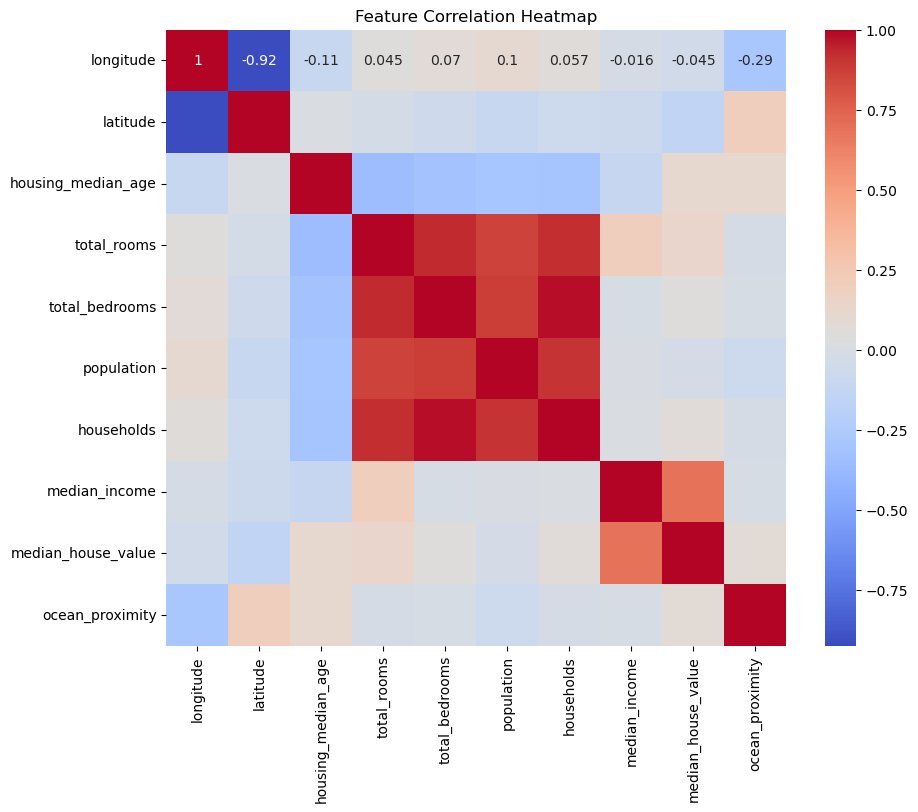

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [46]:
print("\nSimple Linear Regression: 'median_income' to 'median_house_value'")
X_simple = df[['median_income']]
y = df['median_house_value']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
y_pred_s = model_simple.predict(X_test_s)
mae_s = mean_absolute_error(y_test_s, y_pred_s)
mse_s = mean_squared_error(y_test_s, y_pred_s)
rmse_s = np.sqrt(mse_s)
r2_s = r2_score(y_test_s, y_pred_s)
print(f"MAE: {mae_s:.2f}")
print(f"MSE: {mse_s:.2f}")
print(f"RMSE: {rmse_s:.2f}")
print(f"R² Score: {r2_s:.4f}")
print(f"Coefficient: {model_simple.coef_[0]:.4f}")
print(f"Intercept: {model_simple.intercept_:.4f}")


Simple Linear Regression: 'median_income' to 'median_house_value'
MAE: 63374.55
MSE: 7221011204.24
RMSE: 84976.53
R² Score: 0.4720
Coefficient: 41751.9580
Intercept: 45035.2282


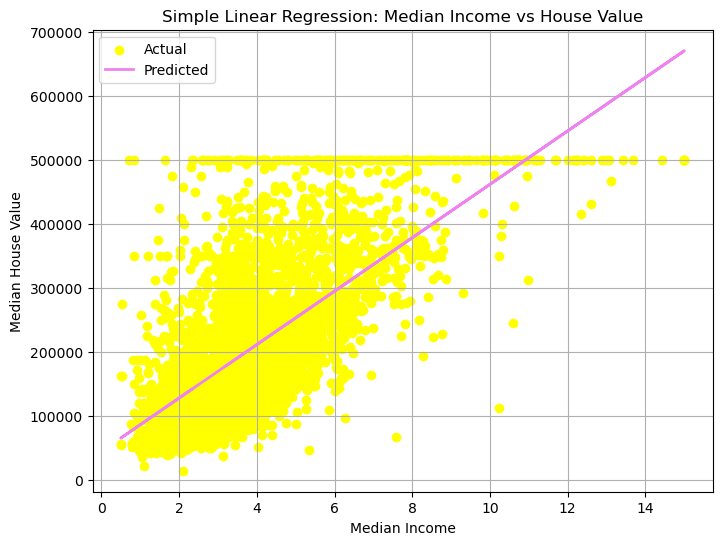

In [47]:
#plot simple linear regression
plt.figure(figsize=(8, 6))
plt.scatter(X_test_s, y_test_s, color='yellow', label='Actual')
plt.plot(X_test_s, y_pred_s, color='violet', linewidth=2, label='Predicted')
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Simple Linear Regression: Median Income vs House Value")
plt.legend()
plt.grid(True)
plt.show()

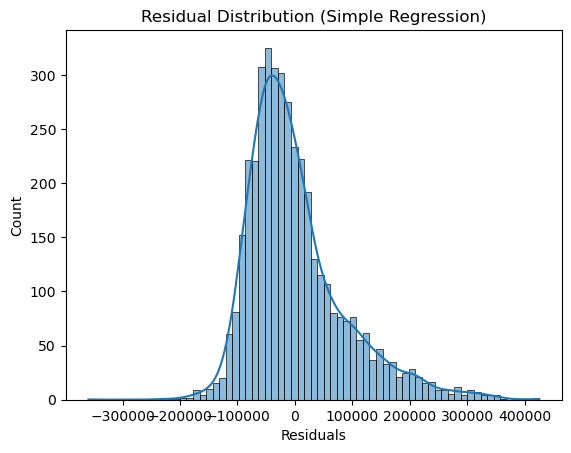

In [48]:
#residuals distribution
residuals_s = y_test_s - y_pred_s
sns.histplot(residuals_s, kde=True)
plt.title("Residual Distribution (Simple Regression)")
plt.xlabel("Residuals")
plt.show()

In [49]:
print("\nMultiple Linear Regression: All features to 'median_house_value'")

X_multi = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

y_pred_m = model_multi.predict(X_test_m)


Multiple Linear Regression: All features to 'median_house_value'


In [50]:
#MAE,MSE,RMSE calctn
mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
rmse_m = np.sqrt(mse_m)
r2_m = r2_score(y_test_m, y_pred_m)
print(f"MAE: {mae_m:.2f}")
print(f"MSE: {mse_m:.2f}")
print(f"RMSE: {rmse_m:.2f}")
print(f"R² Score: {r2_m:.4f}")

MAE: 51388.70
MSE: 4924108937.91
RMSE: 70172.00
R² Score: 0.6399


In [51]:
#interpreting coefficients
print("\nModel Coefficients:")
for feat, coef in zip(X_multi.columns, model_multi.coef_):
    print(f"{feat}: {coef:.4f}")
print(f"Intercept: {model_multi.intercept_:.4f}")


Model Coefficients:
longitude: -42768.6800
latitude: -42483.0398
housing_median_age: 1156.7967
total_rooms: -8.3736
total_bedrooms: 115.9608
population: -36.8767
households: 41.4659
median_income: 40259.5494
ocean_proximity: -394.0987
Intercept: -3590426.7699


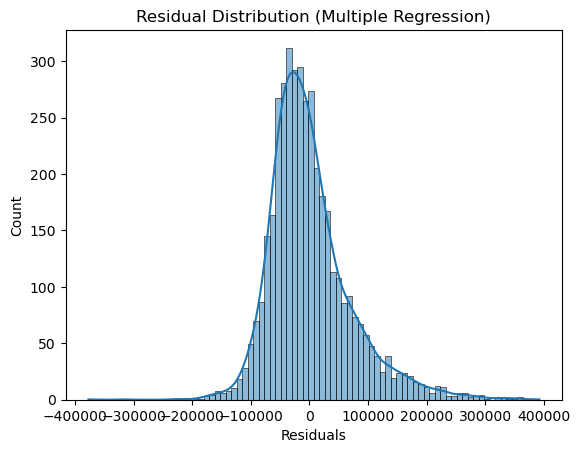

In [52]:
#Residual Distribution
residuals_m = y_test_m - y_pred_m
sns.histplot(residuals_m, kde=True)
plt.title("Residual Distribution (Multiple Regression)")
plt.xlabel("Residuals")
plt.show()

In [53]:
joblib.dump(model_multi, "multiple_linear_regression_model.pkl")
print("\nMultiple Linear Regression model saved as 'multiple_linear_regression_model.pkl'")


Multiple Linear Regression model saved as 'multiple_linear_regression_model.pkl'
